# Sampling and Experimental Design

## Randomized Response Sampling

Randomized response sampling is commonly used in situations where legal implications of a question can lead to response bias among respondents. An example would be asking high schoolers if they have illegally consumed alcohol. If the respondents are not confident that their responses are secure, they may not respond truthfully.

Randomized response sampling is a procedure for securing the confidentiality of results in such a situation. This technique introduces a controlled form of randomness, e.g. a fair coin, into the answer that the survey respondent supplies to the survey administrator. Over a large number of responses, this source of randomness can be "averaged out" to delivery an estimate that is approximately correct in aggregate. At the same time, the source of randomness provides each indiviual respondent with plausible deniability if they deliver a response with potential legal consequences.

In this section, we simulate the case of trying to estimate alcohol consumption among high schoolers using a coin flip as the source of randomness. We assume that the question asked of the survey respondent is: "Have you ever consumed alcohol?". We assume that the respondent can only answer "yes" or "no". We assume that the survey respondent could be in legal trouble for giving the answer "yes", but not for giving the answer "no".

The randomized response procedure makes use of this assymetry to provide plausible deniability in the case of a "yes" answer. The survey is set up as follows:
   1. The survey respondent is given a fair coin, and told to flip it before answering the question.
   2. The respondent and the administrator are seated in a way that the administrator cannot see the result of the coin flip. However we don't assume further anonymizing of the results, e.g. the respondent's name will be recorded with their response.
   3. Based on the result of the coin flip, the respondent answers the question as follows:
   
      a) If the coin flip comes up heads, answer "yes" even if you have never consumed alcohol.
      
      b) If the coin flip comes up tails, answer truthfully.
      
Call $P_A$ the true proportion of high schoolers who have consumed alcohol, i.e. the number that the survey is seeking to estimate. Call $P_Y$ the proportion of survey respondents who answer "yes" to the question. Then notice that if the coin flipped before answering is fair, we have: 

$$P_Y \approx 0.5 + 0.5 P_A$$

This is because approximately 50% of respondents will answer "yes" because their coin flip came up heads. Among the other 50% whose coin flips came up tails, approximately $P_A$ will answer "yes" (these are respondents truthfully reporting that they've consumed alcohol). Solving for $P_A$:

$$P_A \approx 2 (P_Y - 0.5)$$

Intuitively, what's happening here is that we need to subtract off from $P_Y$ those who answered "yes" because their coin flip came up heads, then double what remains to account for the fact that there was only a 50% chance that a respondent who had consumed alcohol would get tails on their coin flip and report the truth.

In this tutorial, we'll first demonstrate that this procedure works. Then we'll examine its sentitivity to sample size and to $P_A$.

### Proof of Concept

First, a simple example on a large dataset to demonstrate that this idea even works. We'll generate a random $P_A$, then simulate both alcohol consumption and the coin toss. We'll then use the formula above to estimate $P_A$, and compare it to the actual value via mean absolute deviation.

In [96]:
import numpy as np

In [97]:
P_A = np.random.uniform(0,1) #don't peek at this until the end
n_students = 10000 # this is a really big high school

alcohol_consumption = np.random.binomial(1, P_A, n_students) #encode yes as 1, no as 0
coin_flips = np.random.binomial(1, 0.5, n_students) # tails is 0, heads is 1

survey_responses = alcohol_consumption + coin_flips - alcohol_consumption * coin_flips # easy way to compute response procedure above

In [98]:
print(f"Our estimate is: {2* (survey_responses.mean() - 0.5)}")
print(f"The actual value of P_A was: {P_A}")
print(f"Our absolute percentage error with this procedure is: {100*abs((2* (survey_responses.mean() - 0.5) - P_A)):.3f}%")

Our estimate is: 0.9132
The actual value of P_A was: 0.911374783923657
Our absolute percentage error with this procedure is: 0.183%


We see that the estimate is fairly good; if we run it a few times we find that the MAD is generally below 1% and often below 0.5%. Let's repeat this experiment a large number of times to see what the error distribution looks like.

In [100]:
import tqdm, seaborn
seaborn.set(rc={'figure.figsize': (20,10)})

In [101]:
mads = []

for i in tqdm.tqdm(range(10000)):
    P_A = np.random.uniform(0,1)
    n_students = 10000 

    alcohol_consumption = np.random.binomial(1, P_A, n_students)
    coin_flips = np.random.binomial(1, 0.5, n_students) 

    survey_responses = alcohol_consumption + coin_flips - alcohol_consumption * coin_flips 
    
    mads.append(100*abs((2* (survey_responses.mean() - 0.5) - P_A)))

100%|██████████| 10000/10000 [00:03<00:00, 2641.80it/s]


/home/anthony/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

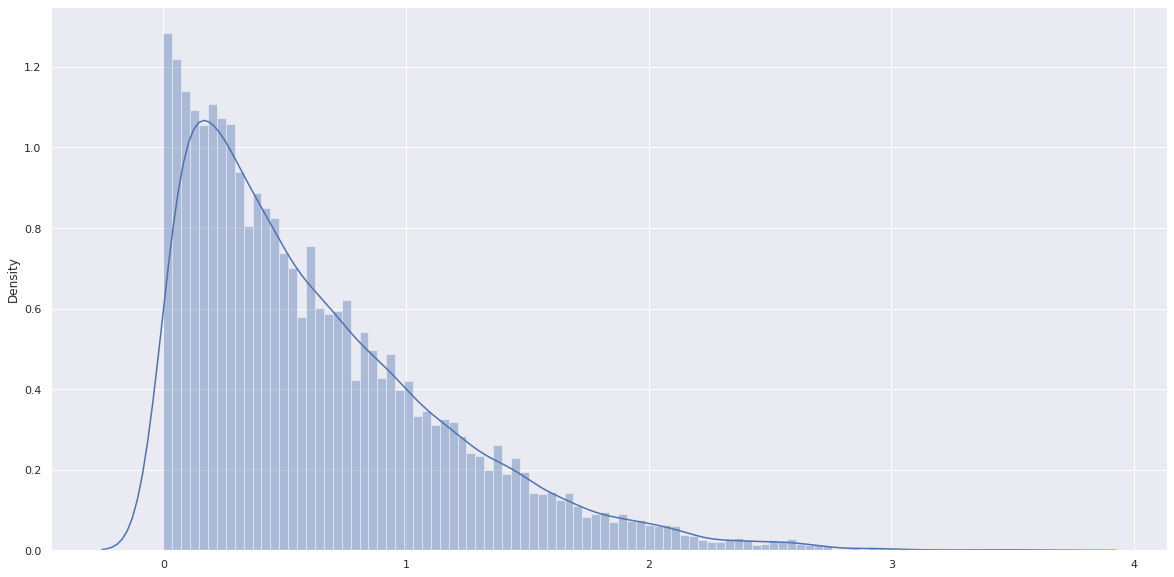

In [102]:
seaborn.distplot(mads, bins=100)

We see that there are a small number of errors of 2% of more, but generally this procedure gets us to within 1% of the actual value. Looking at some percentiles of the error distribution confirms this:

In [103]:
np.percentile(mads, [0.1, 0.25, 0.5, 0.75, 0.9])

array([0.00085156, 0.0020447 , 0.00426316, 0.00604083, 0.00765547])

### Accuracy Sensitivity to Sample Size

Most high schools don't enroll thousands of students. In fact it may be hard to even get a few hundred responses in a survey like this. How is our accuracy affected by a more modest sample size, e.g. 500?

In [104]:
P_A = np.random.uniform(0,1) #don't peek at this until the end
n_students = 500 # a much smaller high scool

alcohol_consumption = np.random.binomial(1, P_A, n_students) #encode yes as 1, no as 0
coin_flips = np.random.binomial(1, 0.5, n_students) # tails is 0, heads is 1

survey_responses = alcohol_consumption + coin_flips - alcohol_consumption * coin_flips # easy way to compute response procedure above

In [105]:
print(f"Our estimate is: {2* (survey_responses.mean() - 0.5)}")
print(f"The actual value of P_A was: {P_A}")
print(f"Our absolute percentage error with this procedure is: {100*abs((2* (survey_responses.mean() - 0.5) - P_A)):.3f}%")

Our estimate is: 0.028000000000000025
The actual value of P_A was: 0.07495417320146258
Our absolute percentage error with this procedure is: 4.695%


Already we see that we're getting much bigger errors. Let's look at the error distribution again:

In [106]:
mads = []

for i in tqdm.tqdm(range(10000)):
    P_A = np.random.uniform(0,1)
    n_students = 500 

    alcohol_consumption = np.random.binomial(1, P_A, n_students)
    coin_flips = np.random.binomial(1, 0.5, n_students) 

    survey_responses = alcohol_consumption + coin_flips - alcohol_consumption * coin_flips 
    
    mads.append(100*abs((2* (survey_responses.mean() - 0.5) - P_A)))

100%|██████████| 10000/10000 [00:00<00:00, 21526.22it/s]


/home/anthony/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

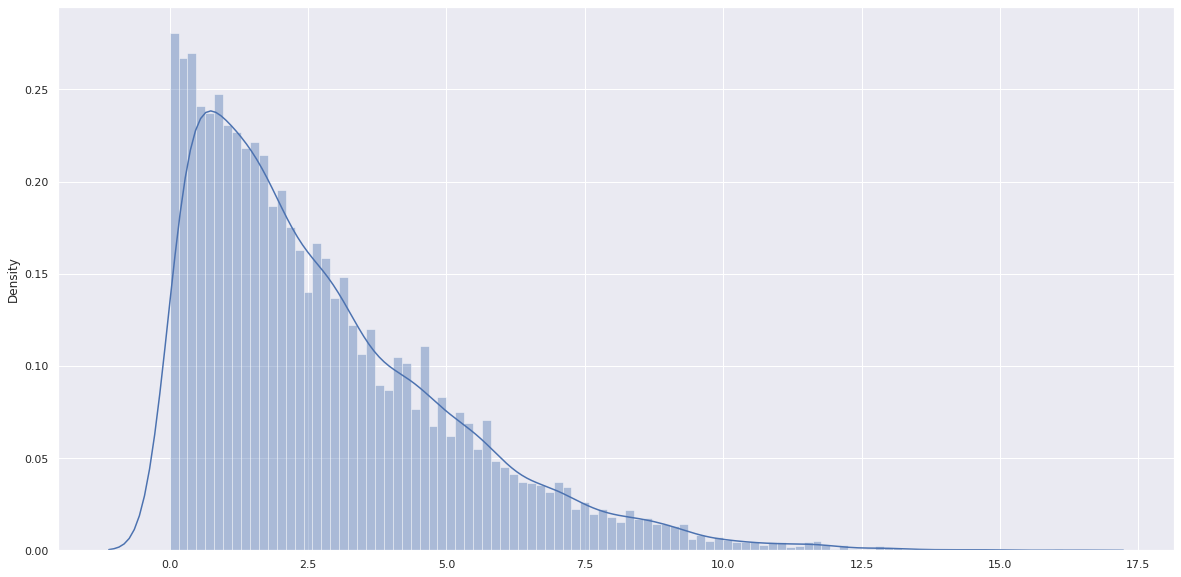

In [107]:
seaborn.distplot(mads, bins=100)

These look to be much larger errors than before. This is confirmed by looking at some quantiles of the error distribution:

In [110]:
np.percentile(mads, [0.1, 0.25, 0.5, 0.75, 0.9])

array([0.00569171, 0.01072956, 0.01887646, 0.02499661, 0.03046997])

Let's hold $P_A$ fixed, and vary the sample size of the survey. We'll plot this against the error for each survey to see if there is a pattern.

In [130]:
P_A = np.random.uniform(0,1)
sample_sizes = []
mads = []

for i in tqdm.tqdm(range(1000)):
    n_students = int(np.random.uniform(10,1000))

    alcohol_consumption = np.random.binomial(1, P_A, n_students)
    coin_flips = np.random.binomial(1, 0.5, n_students) 

    survey_responses = alcohol_consumption + coin_flips - alcohol_consumption * coin_flips 
    
    sample_sizes.append(n_students)
    mads.append(100*abs((2* (survey_responses.mean() - 0.5) - P_A)))

100%|██████████| 1000/1000 [00:00<00:00, 17820.35it/s]


/home/anthony/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

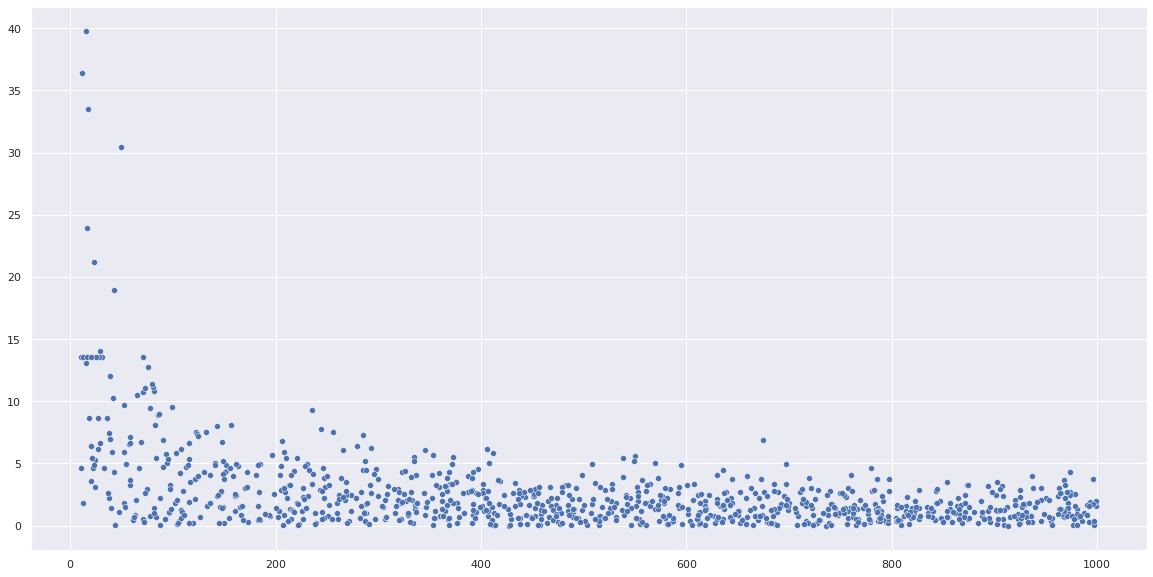

In [131]:
seaborn.scatterplot(sample_sizes, mads)

We see that the large errors are mostly concentrated in the small samples, although even with 100 students or fewer we often have an error of 5% or less. Increasing the sample size decreases the typical error, though the fall-off is fairly gradual. The estimate of $P_A$ is not much more precise with 1000 respondents than with 500, even though the cost of doing the survey would be about double.

### Accuracy Sensitivity to $P_A$

Returning to a fixed sample size, let's see if the estimate accuracy is sensitive to the value of $P_A$. It may be that values close to 0 or 1 might be hard to estimate. We'll return to a fixed sample size of 10000.

In [134]:
pas = []
mads = []

for i in tqdm.tqdm(range(10000)):
    P_A = np.random.uniform(0,1)
    n_students = 10000

    alcohol_consumption = np.random.binomial(1, P_A, n_students)
    coin_flips = np.random.binomial(1, 0.5, n_students) 

    survey_responses = alcohol_consumption + coin_flips - alcohol_consumption * coin_flips 
    
    pas.append(P_A)
    mads.append(100*abs((2* (survey_responses.mean() - 0.5) - P_A)))

100%|██████████| 10000/10000 [00:03<00:00, 2586.80it/s]


/home/anthony/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

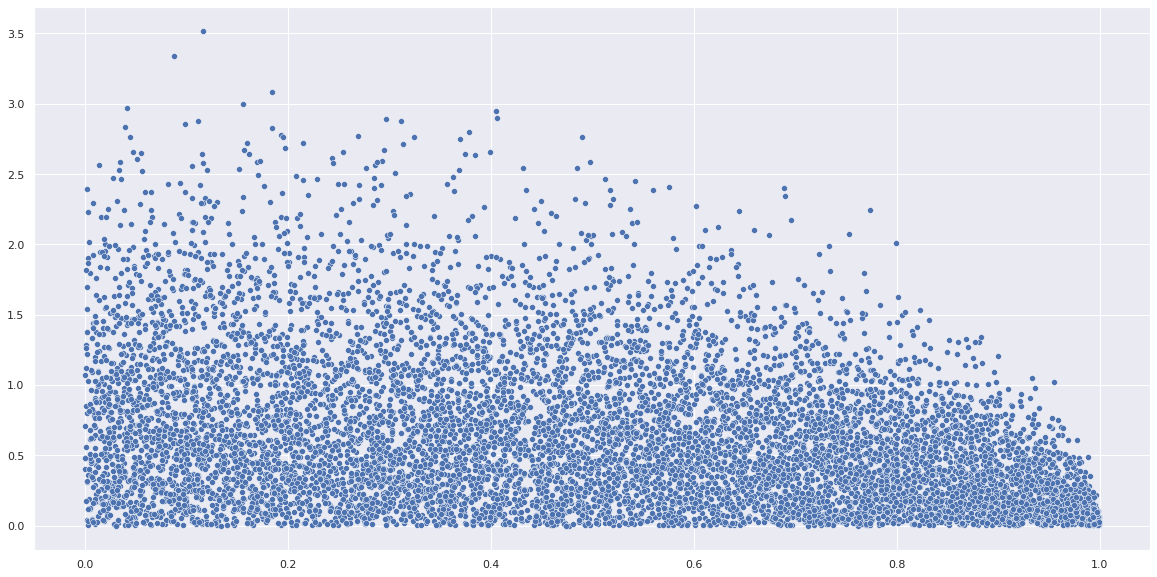

In [135]:
seaborn.scatterplot(pas, mads)

The trend is very slight, but we do see that there is a downward trend as $P_A$ gets close to 1. The reason for this is that when $P_A \approx 0$, there are very few true "yes" responses to estimate $P_A$ from.